In [1]:
import pandas_profiling
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# 1, 2
df = pd.concat([pd.read_csv('heart_train.csv'), 
                pd.read_csv('heart_test.csv')]).reset_index().drop('index', axis=1)

In [3]:
# 3
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns')
df.head(3)

We have 303 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [4]:
for column in df.columns:
    unique_variables = np.unique(df[column])
    print(f'column "{column}" - has {len(unique_variables)} different variables\n{unique_variables}\n')

column "age" - has 41 different variables
[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]

column "sex" - has 2 different variables
[0 1]

column "cp" - has 4 different variables
[0 1 2 3]

column "trestbps" - has 49 different variables
[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]

column "chol" - has 152 different variables
[126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 2

In [5]:
# 4
numeric = ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']
categorical = ['cp', 'restecg', 'slope', 'thal', 'ca']
boolean = ['exang', 'fbs', 'sex']
        
print(f'categorical features - {categorical}\nnumerical features - {numeric}\nboolean features - {boolean}')

categorical features - ['cp', 'restecg', 'slope', 'thal', 'ca']
numerical features - ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']
boolean features - ['exang', 'fbs', 'sex']


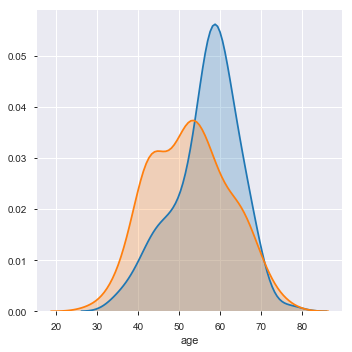

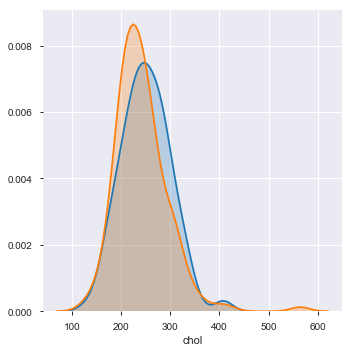

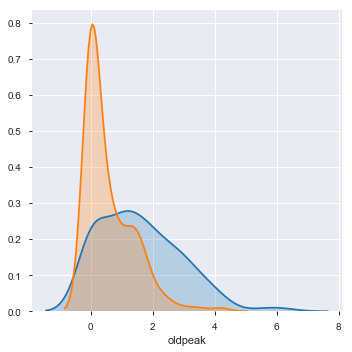

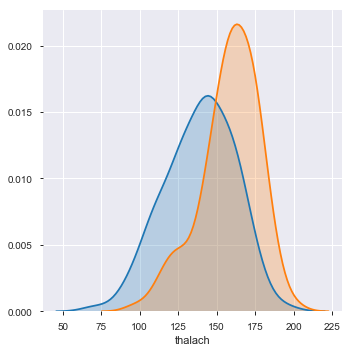

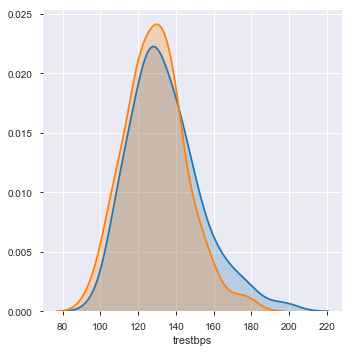

In [6]:
# 5
# values distribution for each numerical column

def plot_num_distribution(variable):
    g = sns.FacetGrid(df, hue='target', height=5)
    g.map(sns.kdeplot, variable,shade=True);

for column in numeric:
    plot_num_distribution(column)

We can see that columns age, oldpeak and thalach dependent on target and they will show good performance in the model.

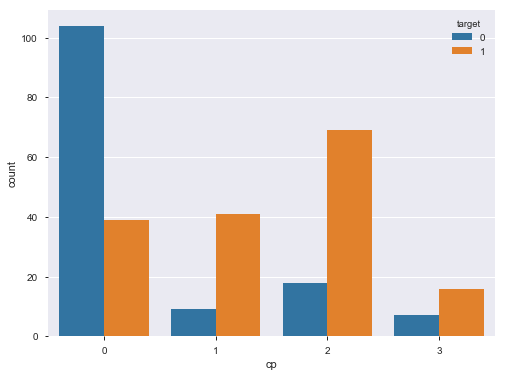

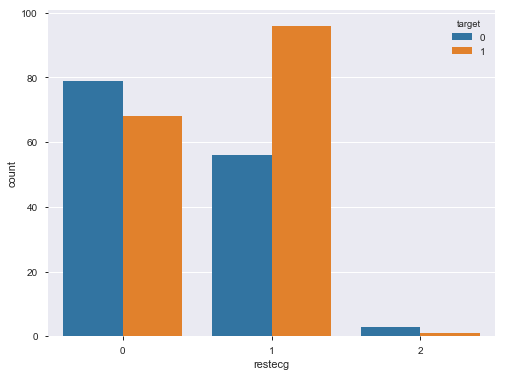

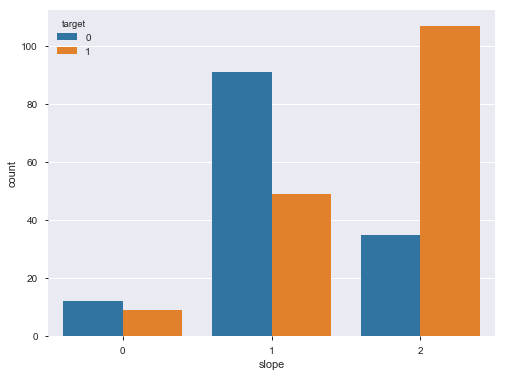

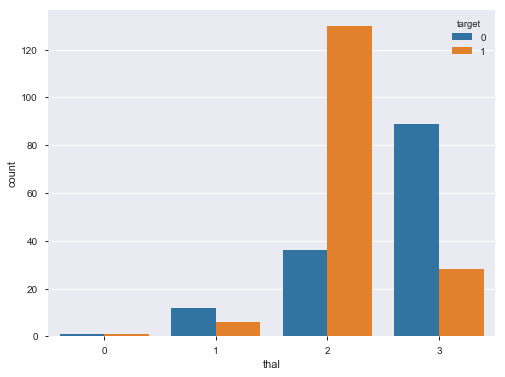

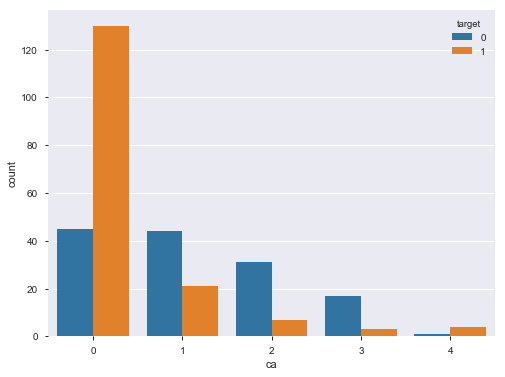

In [7]:
# 6
# frequency distribution of values for each categorical columns

def plot_cat_distribution(variable):
    plt.figure(figsize=(8,6))
    sns.countplot(df[variable], hue='target', data= df);
    
for column in categorical:
    plot_cat_distribution(column)

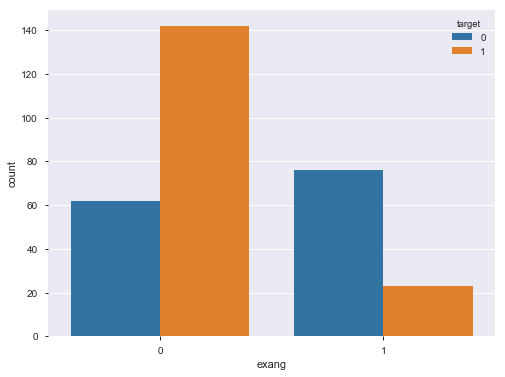

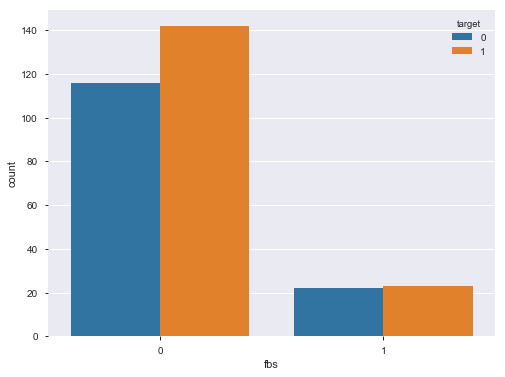

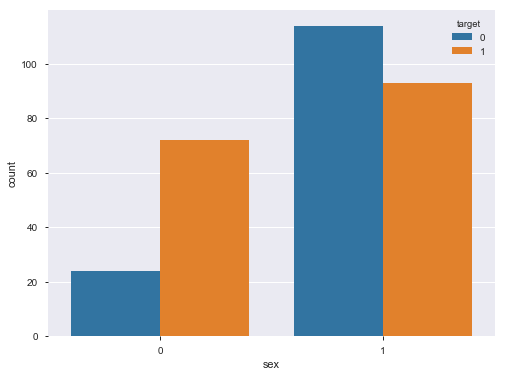

In [8]:
# frequency distribution of values for boolean columns

for column in boolean:
    plot_cat_distribution(column)

We can see that columns cp, slope, thal, ca, exang dependent on target and they will show good performance in the model.

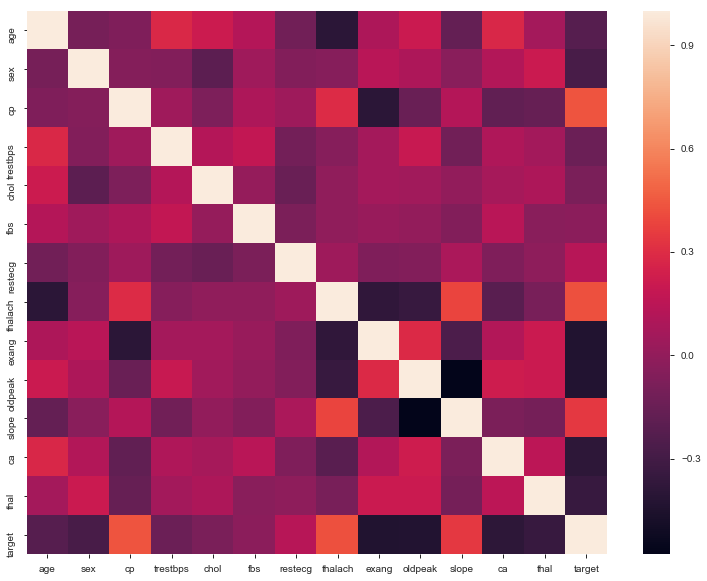

In [9]:
# 7
plt.figure(figsize=(13,10))
sns.heatmap(df.corr());

In [10]:
#8
x, y = df.drop('target', axis=1), df['target'].values
x_categorical = OneHotEncoder(sparse=False).fit_transform(x[categorical]) 
x_scaled = StandardScaler().fit_transform(x[numeric])

X = np.hstack((x_categorical, x_scaled))

In [11]:
df.profile_report()

It is not difficult to notice that the target variable correlates well with THALACH, THAL, OLDPEAK, EXANG, CP, CA. I would pay close attention to them when building a model. But I think we should not forget about the other columns, because the correlation shows only a linear(pearson) relationship.